### Import useful libraries

In [1]:
import numpy as np
import scipy.stats as st
import scipy.signal as signal
import matplotlib.pyplot as plt

## (i) Probability distributions

Use *scipy.stats* module to work on different probability distributions. Use documentation [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

#### 1. Bernoulli - an example of discrete distribution

##### Bernoulli distribution is a discrete probability distribution. It describes the probability of achieving a “success” or “failure” from a Bernoulli trial. A Bernoulli trial is an event that has only two possible outcomes (success or failure). For example, will a coin land on heads (success) or tails (failure)?

##### The math behind one is f(k;p) = pk + (1-p)(1-k)
##### p	=	probability
##### k	=	possible outcomes
##### f	=	probability mass function

##### more info found at this [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html#scipy.stats.bernoulli) 


In [2]:
dist_bernoulli = st.bernoulli # create an object for Bernoulli distribution
p = 0.3 # specify the shape parameter of a Bernoulli distribution
x = dist_bernoulli.rvs(p, size=1000) # generate 1000 random samples from the Bernoulli distribution

# evluate the probability mass function (pmf) at 0 and 1
xs = np.array([0, 1]) # posible values
pmf_bernoulli = dist_bernoulli.pmf(xs, p) # pmf with parameter p at xs

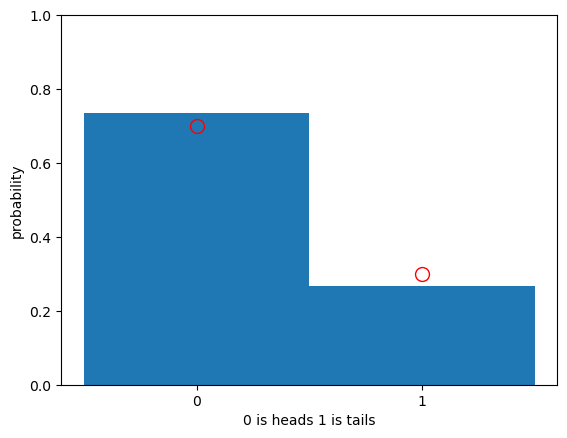

In [3]:
plt.figure()
# plot histogram of the relative frequency of 0's and 1's
plt.hist(x, bins=xs.size, range=(xs[0]-.5, xs[-1]+.5), density=True) 

# plot pmf with red circles
plt.plot(xs, pmf_bernoulli, 'ro', markersize=10, markerfacecolor='None')

plt.xticks(xs)
plt.ylim([0, 1])
plt.xlabel('0 is heads 1 is tails')
plt.ylabel('probability')
plt.show()

#### 2. Gaussian - an example of continuous distribution

##### Gaussian distribution (also known as normal distribution) is a bell-shaped curve, and it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value (in our example mean of 100). Something common that follows a bell shaped curve is IQ scores!

##### The math behind this distribution is y = 1/(S(√(2pi))*e^z     z= -((x-u)/(2s^2))
##### u = mean
##### s = standard deviation

#### more info found at this [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)

In [4]:
dist_norm = st.norm # create an object for Gaussian distribution
mu, sigma = 100, 15 # specify the mean and standard deviation of a Gaussian distribution
x = dist_norm.rvs(loc=mu, scale=sigma, size=5000) # generate 5000 random samples from the Gausiian distribution

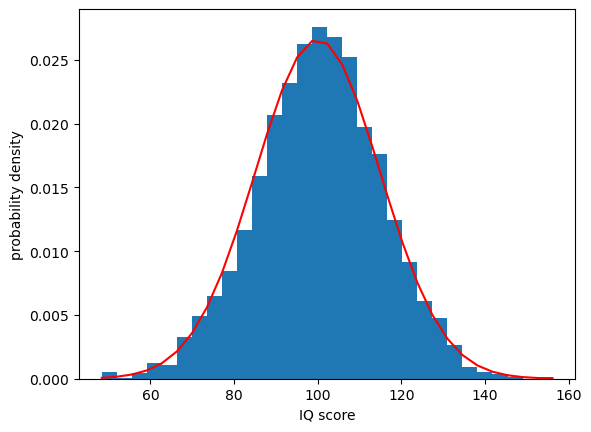

In [5]:
plt.figure()
# plot histogram
_ , xs, _ = plt.hist(x, bins=30, density=True) # return edges of bins in xs

# plot the probability density function (pdf)
pdf_norm = dist_norm.pdf(xs, loc=mu, scale=sigma)
plt.plot(xs, pdf_norm, 'r')

plt.xlabel('IQ score')
plt.ylabel('probability density')
plt.show()

#### 3. Uniform noise (random value between 0, 10) 

##### The math behind this noise is P(x) = 1/(b-a)
##### Where a and b are numbers and a is the low end of b is the high end of the noise
##### [more about uniform noise function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)

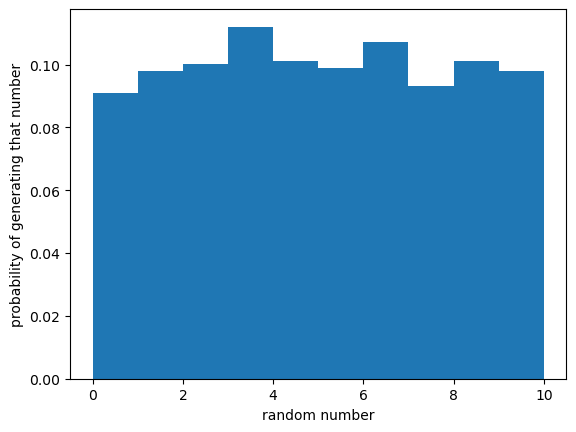

In [6]:
data = np.random.uniform(low=0.0,high=10.0,size=1000)
plt.figure()

count, bins, ignored = plt.hist(data, density=True)
plt.xlabel('random number')
plt.ylabel('probability of generating that number')
plt.show()

#### 4. Log-normal noise

##### A common type of noise used in modeling the brain as all synpases in the brain are believed to be from a log-normal distibution. It can also be common to set a max value on the log-normal distribution such as 5 times the mean in order from preventing the log-normal distibution containing extremely large values

##### math behind this noise is the same as Guassian function but takes x as log(x)

##### more info found at this [link](https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html)

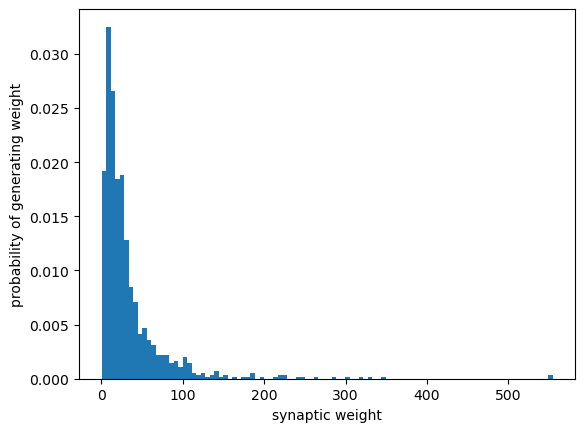

In [7]:
data = np.random.lognormal(mean=3, sigma=1, size=1000)
plt.figure()

count, bins, ignored = plt.hist(data, 100, density=True, align='mid')
#x = np.linspace(min(bins), max(bins), 10000)
#pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
#plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.xlabel('synaptic weight')
plt.ylabel('probability of generating weight')
plt.show()

#### 5. Poisson noise
##### Poisson noise is a discrete distribution which gives the probability of a number of independent events occuring in a fixed time. An example of this could be how many fish you catch in an hour.

##### more info can be found at this [link](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html)

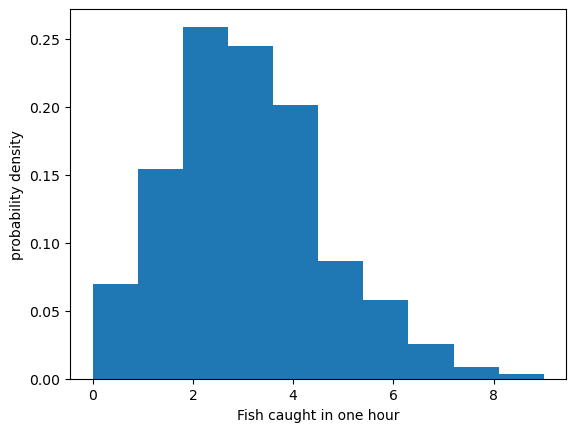

In [8]:
data = np.random.poisson(3,1000)

plt.hist(data, density=True)
plt.ylabel("probability density")
plt.xlabel("Fish caught in one hour")
plt.show()

#### 6. Exponential noise
##### The exponential distribution is often concerned with the amount of time until some specific event occurs. For example, the amount of time (beginning now) until an earthquake occurs has an exponential distribution. Something to try and understand is that Poisson distribution deals with number of occurences of an event in a time period whereas exponential distribution deals with the time between these events

##### more info can be found at this [link](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html)

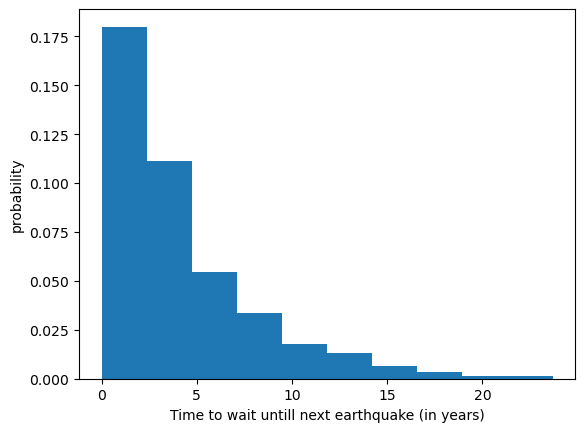

In [9]:
data = np.random.exponential(4,1000)

plt.hist(data, density=True)
plt.ylabel("probability")
plt.xlabel("Time to wait untill next earthquake (in years)")
plt.show()

#### Now lets discuss a method for fitting a distribution to your dataset. In the real work you might have collected data and you want to make a Generalized Linear Model (GLM) to try to predict something using your dataset. When building these models you have to select which distribution your dataset is. To find out which distribution fits best you can use the Fitter library in python. This will use SciPy to try and fit serveral different distributions and tell you which ones are best. Below is an example.

##### more info can be found out about this library [here](https://fitter.readthedocs.io/en/latest/index.html) 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.042511,1117.327269,-123664.907641,inf,0.051110,3.837423e-23
lognorm,0.043162,1128.468857,-123503.804943,inf,0.050723,8.441847e-23
gamma,0.059791,1167.978309,-120244.776134,inf,0.059596,2.575324e-31
chi2,0.062993,1252.522772,-119723.159641,inf,0.060506,2.882517e-32
cauchy,0.116145,730.453813,-113614.143417,inf,0.098154,2.591146e-84


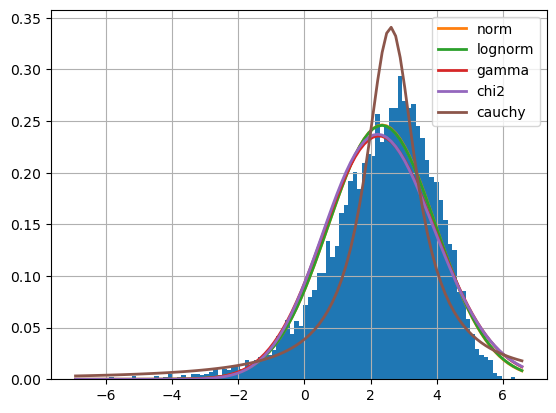

In [29]:
from fitter import Fitter, get_common_distributions
data = st.loggamma.rvs(2, loc=1.5, scale=2, size=10000)
f = Fitter(data,
           distributions=get_common_distributions()) # you dont have to use the common distributions you can leave this blank and it wil go into
                                                     # all distribution or you can say which distributions example commented out below
#f = Fitter(data,
#           distributions=['gamma',
#                          'lognorm',
#                          "beta",
#                          "burr",
#                          "norm"])

f.fit()
f.summary()

##### If this was your dataset that you are working on it might be good to try and build a GLM with a norm or lognorm distribution since they have the lowest AIC value (lower number means distribution fit better)

## (ii) Time series of noise

What is [Colored noise](https://en.wikipedia.org/wiki/Colors_of_noise)?

Specify properties of the time series

In [11]:
fs = 1000 # 1000 Hz sampling frequency of time series
N = 10000 # length of the time series (10 sec)
t = np.arange(N) / fs * 1000 # time points in ms

#### White noise
##### white noise is generated from a Gaussian distribution. You can see this by us using the same code to generate the noise we just plot the noise differently.

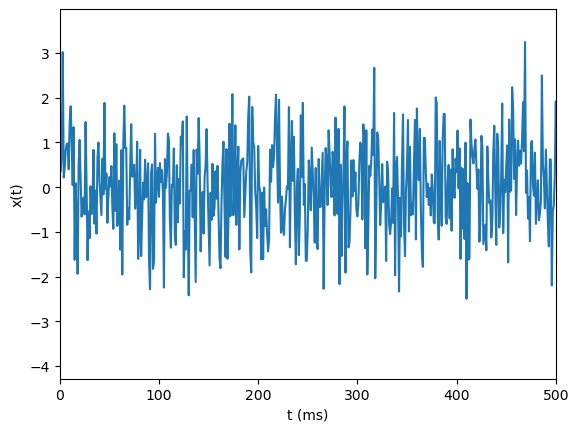

In [12]:
white_noise = dist_norm.rvs(size=N) # draw from standard Gaussian distribution

plt.figure()
plt.plot(t, white_noise)
plt.xlim([0, 500]) # show the first 500 ms
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

#### Brownian noise (random walk)
##### Brownian noise is obtained by taking the intergal of white noise or in our case the cumulative sum of white noise. An example of brownian noise is the motion of particles

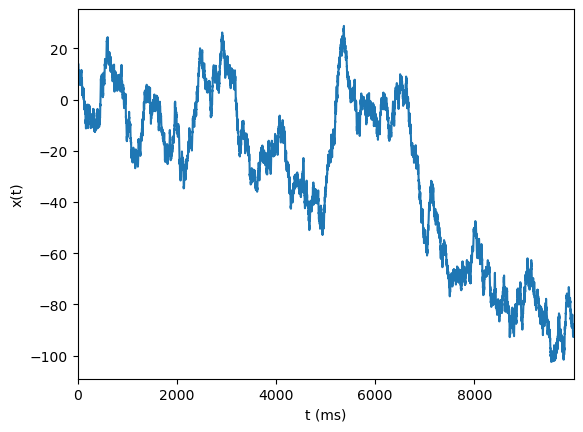

In [13]:
brownian_noise = np.cumsum(white_noise) # summing up white noise

plt.figure()
plt.plot(t, brownian_noise)
plt.xlim(t[[0, -1]])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

#### Pink noise

In [14]:
# install the package
%pip install colorednoise

Note: you may need to restart the kernel to use updated packages.


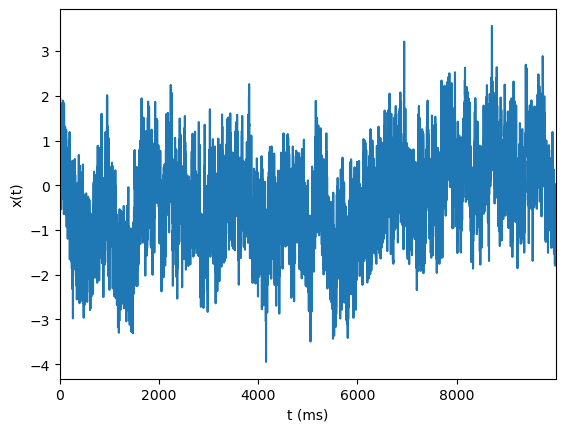

In [15]:
import colorednoise as cn
beta = 1 # set the exponent of 1/f^beta power spectrum (0<beta<2)
pink_noise = cn.powerlaw_psd_gaussian(beta, N)

plt.figure()
plt.plot(t, pink_noise)
plt.xlim(t[[0, -1]])
plt.xlabel('t (ms)')
plt.ylabel('x(t)')
plt.show()

## (iii) Power spectral density (PSD)

Use *scipy.signal.periodogram* and *scipy.signal.welch* to estimate PSD. Use documentation [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html).

White noise has constant power spectrum. Brownian noise has $1/f^2$ PSD. Pink noise has $1/f^\beta$ PSD, $0<\beta<2$.

#### Using pink noise for example

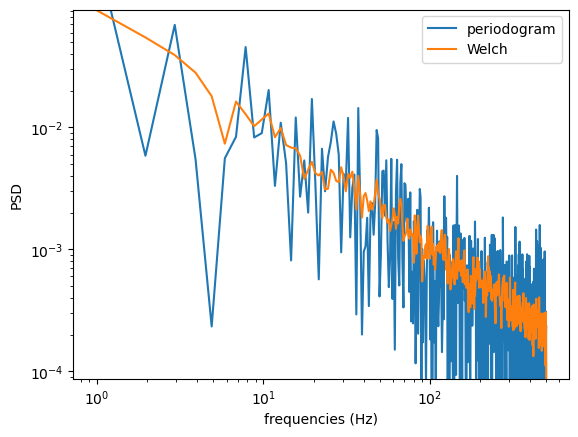

In [16]:
nperseg = 1024 # set length of each segment to 1024 (1024 ms with 1000 Hz sampling rate)

# Estimate PSD using periodogram (Bartlett's method)
f1, pxx1 = signal.periodogram(pink_noise, fs=fs, nfft=nperseg)

# Estimate PSD using Welch's method
f2, pxx2 = signal.welch(pink_noise, fs=fs, nperseg=nperseg)

# Plot estimated PSD
plt.figure()
plt.plot(f1, pxx1, label='periodogram')
plt.plot(f2, pxx2, label='Welch')
plt.xlabel('frequencies (Hz)')
plt.ylabel('PSD')

# display in log-log scale
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.ylim([pxx2.min(),pxx2.max()])

plt.legend()
plt.show()

#### The welch method shows well that the pink noise follows a 1/f pattern that you would expect with pink noise!